followed by [`Audio AI`](https://towardsdatascience.com/audio-ai-isolating-vocals-from-stereo-music-using-convolutional-neural-networks-210532383785)

In [74]:
import os

Data_path = os.path.pardir
Data_path += "/Data/sample/"
print(os.listdir(Data_path))
Data_path += os.listdir(Data_path)[0]
Data_path = os.path.abspath(Data_path)

['Hardwell feat. Amba Shepherd - United We Are (OUT NOW!) #UnitedWeAre.mp3', 'Jonas Blue - Fast Car ft. Dakota (Official Video).mp3']


1.680077e+07
(129,) (13127,) (129, 13127)
(13127,) (129,)


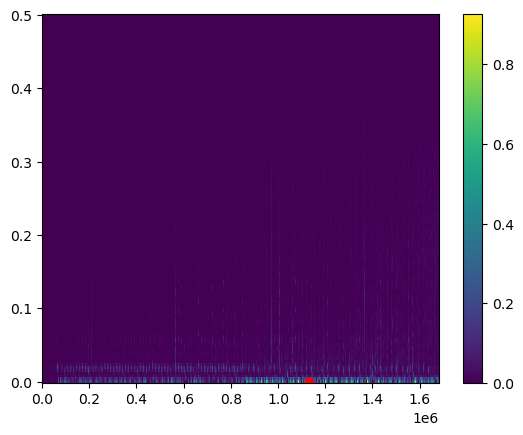

In [122]:
import numpy as np
import matplotlib.pyplot as plt

from pedalboard.io import AudioFile
from scipy.signal import stft

with AudioFile(Data_path, mode="r") as file : 
    # print(file.samplerate)
    # print(file.num_channels)
    # print(file.samplerate * 0.1)
    print("{:e}".format(file.frames))

    count = 1
    while count <= 1 : 
        sample_mono = file.read(int(file.frames / 10))[0]
        f, t, Zxx = stft(sample_mono)
        plt.pcolormesh(t, f, np.abs(Zxx))
        count += 1
        plt.colorbar()

        print(f.shape, t.shape, Zxx.shape)
    
    index = np.where(abs(Zxx) == abs(Zxx).max())
    print(t.shape, f.shape)
    # print(index)
    t_max = len(t)
    plt.plot(t[index[1]], f[index[0]], 'o', color='r')
    # plt.xlim(t[int(index[1] - t_max / 500)], t[int(index[1] + t_max / 500)])
    # plt.ylim(0, 0.01)
    plt.show()

In [100]:
print(abs(Zxx))

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.6314168e-01
  2.2376796e-02 3.6652545e-03]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 8.8296428e-02
  2.0266157e-02 3.8353198e-03]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 9.2758071e-03
  4.4337781e-03 4.3191421e-03]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0007580e-07
  1.8494175e-04 3.2674678e-04]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 4.1254350e-07
  1.8502506e-04 3.2654198e-04]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 6.5821916e-07
  1.8449983e-04 3.2644902e-04]]


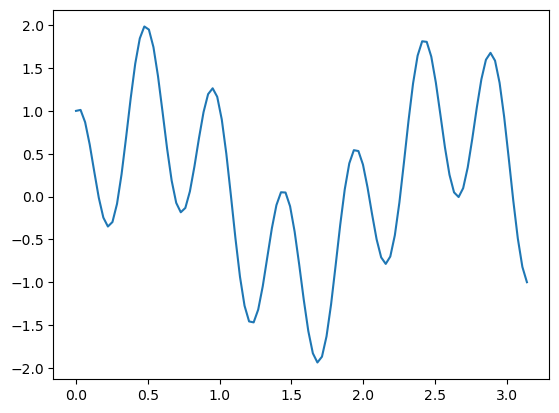

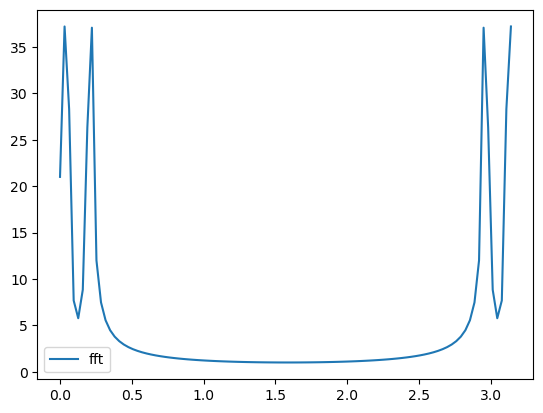

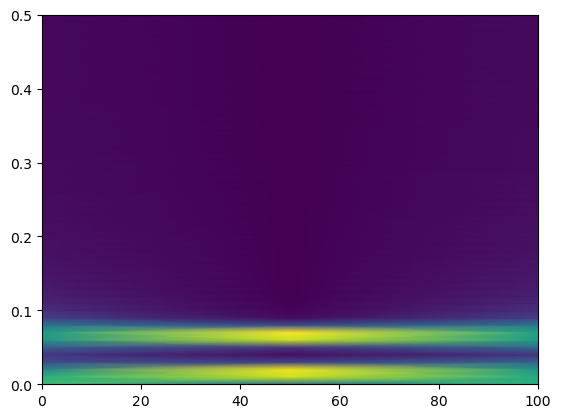

In [54]:
from scipy.signal import stft

from numpy import sin, cos, tan, pi


x_range = np.linspace(0, pi, 100)
sin_range = sin(x_range * 3)
sin_range += cos(x_range * 13)

sin_range_fft = np.fft.fft(sin_range)
f, t, Zxx = stft(sin_range)

# print(sin_range)
# print(sin_range_fft)

plt.plot(x_range, sin_range, label="sin")
plt.show()
plt.plot(x_range, abs(sin_range_fft), label="fft")
plt.legend()
plt.show()
plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud')